# Guided Project: Finding Heavy Traffic Indicators on I-94
### Author: Marwin M I B Carmo

## Introduction

In this project we will practice data exploration and visualization. The chosen dataset provides the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). It can be dowloaded from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

In this analysis we will search for some indicators of heavy traffict on I-94.

In [2]:
# importing packages and reading the dataset
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

traffic = pd.read_csv('data/Metro_Interstate_Traffic_Volume.csv')

In [3]:
# inspecting first five rows
print(traffic.head(5))

# inspecting last five rows
print(traffic.tail(5))

# Exploring dataset info
traffic.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

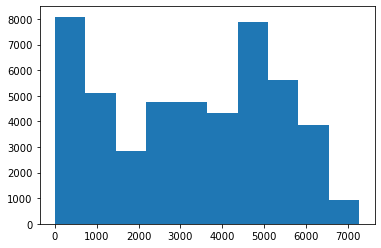

In [4]:
# histogram of traffic_volume column

plt.hist(traffic['traffic_volume'])
plt.show()

In [5]:
# traffic_volume information

traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Inspecting the output from `traffic_volume` column, we see that the distribution looks bimodal. The first quartile says that about 25% of the time, there were 1,193 cars at maximum passing the station each hour. On the other extremity, the third quartile inform us that about 25% of the time, the traffic volume increased to at least 4,933 cars each hour.

There is a strong suspicion that the taffic volume is influeced by the time of the day. To help the investigation, we will divide the dataset into **daytime** data (7 a.m. to 7 p.m.) and **nighttime** data (7 p.m. to 7 a.m.).

## Traffic Volume: Day vs. Night

In [6]:
# first we need to transform the date_time column into datetime object

traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [16]:
# now we isolate the daytime and nighttime data
daytime_data = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour <= 18)]

nighttime_data = traffic[(traffic['date_time'].dt.hour <= 7) | (traffic['date_time'].dt.hour >= 19)]

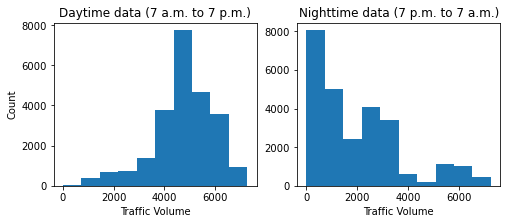

In [17]:
# plotting the histogram for both time separated datasets

# we need a grid chart with two columns and one row:

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.hist(daytime_data['traffic_volume'])
plt.title('Daytime data (7 a.m. to 7 p.m.)')
plt.xlabel('Traffic Volume')
plt.ylabel('Count')
plt.subplot(1,2,2)
plt.hist(nighttime_data['traffic_volume'])
plt.title('Nighttime data (7 p.m. to 7 a.m.)')
plt.xlabel('Traffic Volume')
plt.show()

In [18]:
# exploring traffic_volume statistics for daytime data

daytime_data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


In [19]:
# exploring traffic_volume statistics for nighttime data

nighttime_data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,26406.000000,26406.000000,26406.000000,26406.000000,26406.000000
mean,280.041662,0.142964,0.000181,46.043021,2018.015375
std,13.312483,1.131005,0.007148,39.995392,1713.201969
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.600000,0.000000,0.000000,1.000000,581.000000
50%,281.280000,0.000000,0.000000,40.000000,1485.000000
75%,290.550000,0.000000,0.000000,90.000000,2934.000000
max,307.680000,55.630000,0.510000,100.000000,7260.000000


Examining the histograms we see that for daytime, the data for volume values are described by an approximately normal distribution. As for the nighttime data, the histogram assumes a rightly skewed shape.

The traffic volume during the day has a mean around 4649 and its normal shaped distribution indicates that we should expect values around this mean very often.

At night, we see a histogram peaked at values closer to 0, and mostly under 4000. As expected, this indicates that we should expect low traffic volume at nighttime.

## Time indicators

Another indicator of traffic volume is time. It is reasonable to suppose that the traffic volume change according to indicators as month, day of the week or time of the day.

To start, we can analyze the monthly traffic volume.

In [20]:
# monthly traffic volume average

daytime_data['month'] = daytime_data['date_time'].dt.month
by_month = daytime_data.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-20-e1d64716fd4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_data['month'] = daytime_data['date_time'].dt.month


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

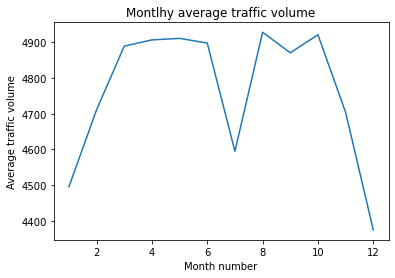

In [21]:
plt.plot(by_month['traffic_volume'])
plt.title('Montlhy average traffic volume')
plt.xlabel('Month number')
plt.ylabel('Average traffic volume')
plt.show()

As expected the traffic volume decreases at the end and beggining of the year. In holidays season people go on vacation or just have more time at home with family or friends. Another point of inflection is the month of July. In USA [July][1] is the month of the highly celebrated [American Independence Day][2]. It is also, on average, the warmest month of the year, so a reduction on work days is expected.

[1]: https://en.wikipedia.org/wiki/July
[2]: https://en.wikipedia.org/wiki/Independence_Day_(United_States)

In [22]:
# traffic average per day of the week

daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek
by_dayofweek = daytime_data.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

<ipython-input-22-c4173ea16767>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

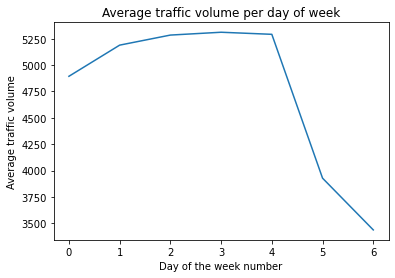

In [23]:
plt.plot(by_dayofweek['traffic_volume'])
plt.title('Average traffic volume per day of week')
plt.xlabel('Day of the week number')
plt.ylabel('Average traffic volume')
plt.show()

No surprises here either. Because most people do not go to office on weekends, the average traffic volume on saturdays and sundays decreases greatly.

In [24]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour
bussiness_days = daytime_data.copy()[daytime_data['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_data.copy()[daytime_data['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-24-0c28ffb3c7c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_data['hour'] = daytime_data['date_time'].dt.hour


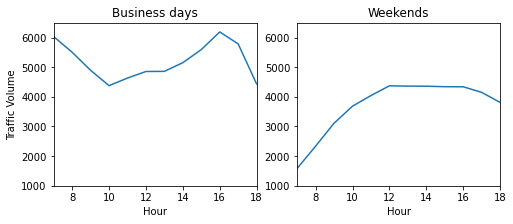

In [33]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Business days')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.axis([7, 18, 1000, 6500])
plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Weekends')
plt.xlabel('Hour')
plt.axis([7, 18, 1000, 6500])
plt.show()

During business days we can identify traffic volume peaks at 7-8 a.m. and 4-5 p.m., presumably when people are out to go to work and go back home respectively.

On weekends the pattern of traffic volume has its peak at 12 p.m. but remains almost constant throughout the rest of the day.

On business days streets are way busier than on weekends.

## Weather Indicators

To check weather indicators of heavy traffic we can check the correlation between numerical columns about weather with `traffic_volume`.

In [36]:
daytime_data.corr()[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']]

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.010815,-0.019286,-0.135519,0.128317
rain_1h,0.010815,1.000000,-0.000091,0.004993,0.003697
snow_1h,-0.019286,-0.000091,1.000000,0.027721,0.001265
clouds_all,-0.135519,0.004993,0.027721,1.000000,-0.032932
traffic_volume,0.128317,0.003697,0.001265,-0.032932,1.000000
month,0.222072,0.001176,0.026768,0.000595,-0.022337
dayofweek,0.000188,-0.009683,-0.008814,-0.041980,-0.416453
hour,0.162691,0.008279,0.003923,0.023685,0.172704


Looking at the correlation values for the weather variables, the temperature (`temp`) shows the strongest correlation with `traffic_volume`. We can build a scatter plot to inspect the pattern of the correlation.

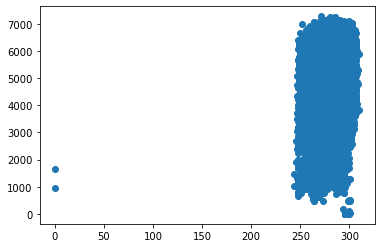

In [37]:
plt.scatter(daytime_data['temp'], daytime_data['traffic_volume'])

We can spot two outliers with temp values of 0. Since we have strong basis to judge these datapoints as entry errors, we can exclude them and build another scatterplot.

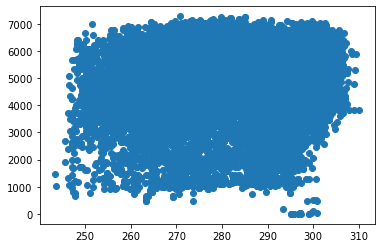

In [46]:
plt.scatter(daytime_data[daytime_data['temp'] > 0]['temp'], daytime_data[daytime_data['temp'] > 0]['traffic_volume'])

That's better. However, the distribution looks like one big block of datapoints and no pattern of data can be inferred. Other weather indicators show even lower correlation values, so we shouldn't expect that they will be any more informative.

## Weather Types

Since numerical weather indicators provided little useful information, we can now turn to investigate the categorical weather variables, `weather_main` and `weather_description`. We're going to calculate the average traffic volume associated with each unique value in these two columns.

In [73]:
# grouping by the weather variables and taking the mean of numerical columns
by_weather_main = daytime_data.groupby('weather_main').mean().reset_index()
by_weather_description = daytime_data.groupby('weather_description').mean().reset_index()

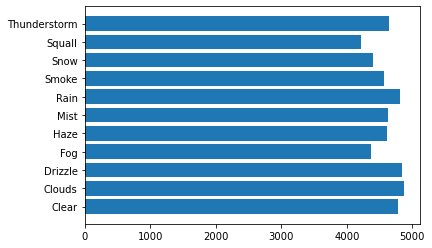

In [71]:
# Horizontal bar plot for the traffic volume by weather condition
plt.barh(by_weather_main['weather_main'], by_weather_main['traffic_volume'])
plt.show()

The column for the short description of the current weather isn't much informative. We see that most categories have traffic volume values very close to each other. We can also see that no weather type exceedes 5,000.

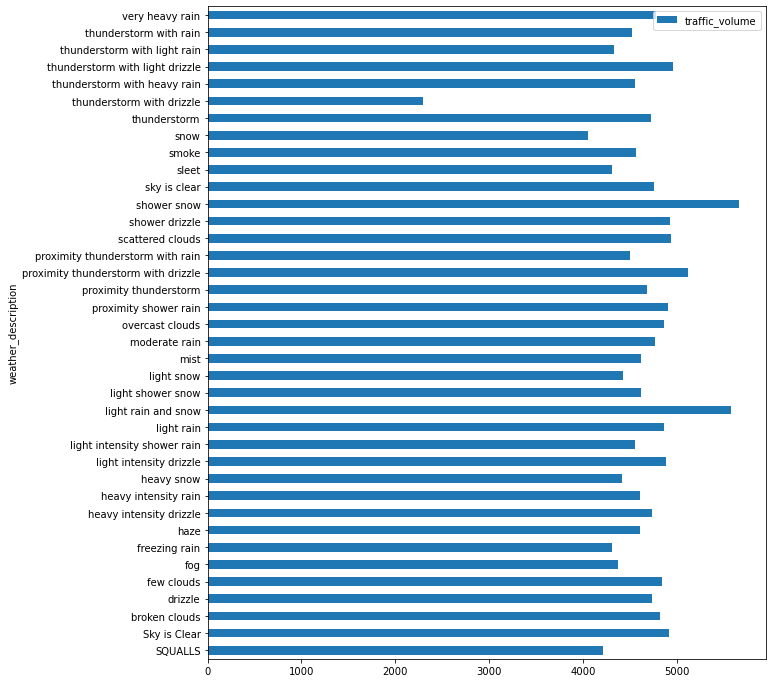

In [77]:
# Horizontal bar plot for the traffic volume by weather description
by_weather_description.plot.barh('weather_description', 'traffic_volume',
        figsize = (10, 12))
plt.show()

This plot gives us some more information. We can see that few weather categories like "thunderstorm with drizzle", "shower snow" and "light rain and snow" exceeds 5,000 cars, beign particularly stronger indicators of heavy traffic.

## Conclusion

To wrap up our descriptive analysis of this dataset, lets recap what we have identifyied as stronger indicators of heavy traffic on I-94 highway:

- In business days the volume of cars on streets is higher than on weekends. We have spotted higher volume peaks at 7 a.m. and 6 p.m.
- During warm months the traffic is heavier. We have identifyied a drop in volume during the period of November to February
- Weather is also a good indicator of traffic volume. Particularl